In [10]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy import stats

sns.set_style("darkgrid")


In [11]:
df = pd.read_csv("Walmart_Sales.csv")

In [12]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [13]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [14]:
df.isnull().sum()


Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [15]:
# Compute Z-scores for 'Weekly_Sales'
z_scores = np.abs(stats.zscore(df['Weekly_Sales']))

# Set a Z-score threshold (commonly 3)
threshold = 3
df_no_outliers_zscore = df[z_scores < threshold]

print("Data without outliers (Z-score method):\n", df_no_outliers_zscore)

Data without outliers (Z-score method):
       Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

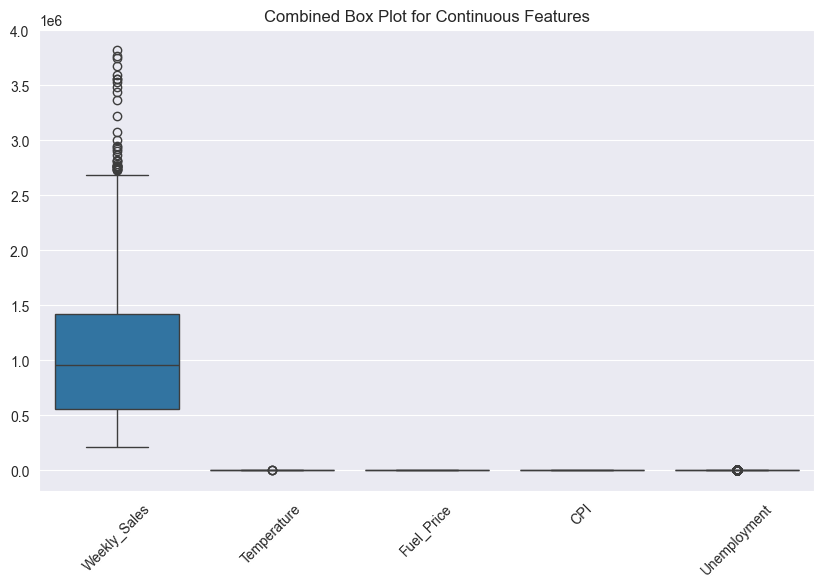

In [16]:


### Combined Box Plot ###
plt.figure(figsize=(10, 6))

# Select continuous variables (excluding categorical like 'Store')
continuous_columns = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# Create box plot for each column
sns.boxplot(data=df[continuous_columns])

# Set the title and labels
plt.title('Combined Box Plot for Continuous Features')
plt.xticks(rotation=45)
plt.show()

In [17]:
# Parse the 'Date' column with day first format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Print the updated DataFrame to verify the correct parsing
print(df)

      Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1 2010-02-05    1643690.90             0        42.31       2.572   
1         1 2010-02-12    1641957.44             1        38.51       2.548   
2         1 2010-02-19    1611968.17             0        39.93       2.514   
3         1 2010-02-26    1409727.59             0        46.63       2.561   
4         1 2010-03-05    1554806.68             0        46.50       2.625   
...     ...        ...           ...           ...          ...         ...   
6430     45 2012-09-28     713173.95             0        64.88       3.997   
6431     45 2012-10-05     733455.07             0        64.89       3.985   
6432     45 2012-10-12     734464.36             0        54.47       4.000   
6433     45 2012-10-19     718125.53             0        56.47       3.969   
6434     45 2012-10-26     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358  

In [18]:
# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Feature engineering: extract useful features from the 'Date' column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek

# Now drop the 'Date' column if you don't need it anymore
X = df.drop(columns=['Weekly_Sales', 'Date'])  # Drop the 'Date' after extracting useful features
y = df['Weekly_Sales']


In [19]:
df.drop(columns=['Date','Store'],inplace=True)

In [20]:
df.dtypes

Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
Year              int32
Month             int32
Day               int32
DayOfWeek         int32
dtype: object

In [22]:
print(df.columns)

Index(['Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'Year', 'Month', 'Day', 'DayOfWeek'],
      dtype='object')


In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df is your cleaned DataFrame
# Dropping irrelevant columns
df = df.drop(columns=['Store', 'Date'],errors='ignore')

# Define features and target variable
X = df.drop(columns=['Weekly_Sales'])
y = df['Weekly_Sales']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Regressor": SVR(),
    "Decision Tree": DecisionTreeRegressor(),
    "K-Nearest Neighbors": KNeighborsRegressor()
}

# Dictionary to hold performance metrics
performance_metrics = {}

# Fit models and calculate RMSE and R²
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Calculate R²
    r2 = r2_score(y_test, y_pred)
    
    # Store metrics
    performance_metrics[model_name] = {
        "RMSE": rmse,
        "R²": r2
    }

# Display performance metrics
for model_name, metrics in performance_metrics.items():
    print(f"{model_name} - RMSE: {metrics['RMSE']:.2f}, R²: {metrics['R²']:.2f}")


Linear Regression - RMSE: 559748.17, R²: 0.03
Random Forest - RMSE: 542987.27, R²: 0.08
Support Vector Regressor - RMSE: 575612.43, R²: -0.03
Decision Tree - RMSE: 657574.78, R²: -0.34
K-Nearest Neighbors - RMSE: 619824.58, R²: -0.19


In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score



# Define features and target variable
X = df.drop(columns=['Weekly_Sales'])
y = df['Weekly_Sales']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestRegressor()

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, 
                           param_grid=param_grid, 
                           scoring='neg_mean_squared_error', 
                           cv=5, 
                           verbose=2, 
                           n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

# Print best parameters
print("Best Parameters:", best_params)

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Calculate RMSE and R²
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print performance metrics
print(f"Random Forest - RMSE: {rmse:.2f}, R²: {r2:.2f}")


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


c:\Program Files\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
229 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Program Files\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Program Files\Python311\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "c:\Program Files\Python311\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Program Files\Python311\Lib\

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Random Forest - RMSE: 504874.22, R²: 0.21


In [25]:
import pickle

# Save the trained Random Forest model to a pickle file
with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(best_rf_model, model_file)

print("Model saved to random_forest_model.pkl")


Model saved to random_forest_model.pkl
